## BZR (BenZodiazepines Recepters) Dataset Analysis


Benzodiazepine receptors, which are found on postsynaptic nerve endings in the central nervous system (CNS), are part of the GABA (gamma-amino butyric acid) receptor complex. GABA is the primary inhibitory neurotransmitter of the CNS.

In [6]:
import networkx as nx
import numpy as np
import scipy as sc
import os
import util
import re

In [7]:

def read_graphfile_viz(datadir, dataname, max_nodes=None, node_map=None):
    prefix = os.path.join(datadir, dataname, dataname)
    filename_graph_indic = prefix + '_graph_indicator.txt'
    graph_indic={}
    with open(filename_graph_indic) as f:
        i=1
        for line in f:
            line=line.strip("\n")
            graph_indic[i]=int(line)
            i+=1

    filename_nodes=prefix + '_node_labels.txt'
    node_labels=[]
    
#     node_map = get_node_map()
    print(f"node map: {node_map}")
    
    try:
        with open(filename_nodes) as f:
            for line in f:
                line=line.strip("\n")
#                 print(line)
#                 node_labels+=[int(line) - 1]
                # node_labels += node_map.get(line)
                node_labels += line
#         print(node_labels)
        num_unique_node_labels = len(set(node_labels))
    except IOError:
        print('No node labels')
 
    filename_node_attrs=prefix + '_node_attributes.txt'
    node_attrs=[]
    try:
        with open(filename_node_attrs) as f:
            for line in f:
                line = line.strip("\s\n")
                attrs = [float(attr) for attr in re.split("[,\s]+", line) if not attr == '']
                node_attrs.append(np.array(attrs))
    except IOError:
        print('No node attributes')
       
    label_has_zero = False
    filename_graphs=prefix + '_graph_labels.txt'
    graph_labels=[]

    label_vals = []
    with open(filename_graphs) as f:
        for line in f:
            line=line.strip("\n")
            val = int(line)
            if val not in label_vals:
                label_vals.append(val)
            graph_labels.append(val)

    label_map_to_int = {val: i for i, val in enumerate(label_vals)}
    graph_labels = np.array([label_map_to_int[l] for l in graph_labels])

    filename_adj=prefix + '_A.txt'
    adj_list={i:[] for i in range(1,len(graph_labels)+1)}    
    index_graph={i:[] for i in range(1,len(graph_labels)+1)}
    num_edges = 0
    with open(filename_adj) as f:
        for line in f:
            line=line.strip("\n").split(",")
            e0,e1=(int(line[0].strip(" ")),int(line[1].strip(" ")))
            adj_list[graph_indic[e0]].append((e0,e1))
            index_graph[graph_indic[e0]]+=[e0,e1]
            num_edges += 1
    for k in index_graph.keys():
        index_graph[k]=[u-1 for u in set(index_graph[k])]
    
    
    graphs=[]
    for i in range(1,1+len(adj_list)):
        G=nx.from_edgelist(adj_list[i])
        G.graph['label'] = graph_labels[i-1]
        for u in util.node_iter(G):
            if len(node_labels) > 0:
                # node_label_one_hot = { node_lbl: 0 for node_lbl in range(num_unique_node_labels)}
                node_label = node_labels[u-1]
                # node_label_one_hot[node_label] = 1
                util.node_dict(G)[u]['label'] = node_label
            if len(node_attrs) > 0:
                util.node_dict(G)[u]['feat'] = node_attrs[u-1]
        if len(node_attrs) > 0:
            G.graph['feat_dim'] = node_attrs[0].shape[0]
        # print(node_labels)
#         print(G.nodes())
#         print(G.edges())
        # print(G.get get_node_attribute('label'))
        # nx.draw(G, with_labels=True)
        
        mapping={}
        
        for n in util.node_iter(G):
            if node_map is not None:
                mapping[n]= f"{node_map.get(G.nodes[n]['label']) + '-' + str(n)}"
            else:
                mapping[n]= f"{G.nodes[n]['label']}"
    #         graphs.append(nx.relabel_nodes(G, mapping))
        graphs.append((G, mapping))

        # node_label_mapping = {}
#         nx.draw(G, labels = mapping, with_labels=True)
#         nx.draw(graphs[, labels = mapping, with_labels=True, node_size=1000)
    return graphs

In [8]:
def get_bzr_node_map():
    activities = """0	O
    1	C
    2	N
    3	F
    4	Cl
    5	S
    6	Br
    7	Si
    8	Na
    9	I
    10	Hg
    11	B
    12	K
    13	P
    14	Au
    15	Cr
    16	Sn
    17	Ca
    18	Cd
    19	Zn
    20	V
    21	As
    22	Li
    23	Cu
    24	Co
    25	Ag
    26	Se
    27	Pt
    28	Al
    29	Bi
    30	Sb
    31	Ba
    32	Fe
    33	H
    34	Ti
    35	Tl
    36	Sr
    37	In
    38	Dy
    39	Ni
    40	Be
    41	Mg
    42	Nd
    43	Pd
    44	Mn
    45	Zr
    46	Pb
    47	Yb
    48	Mo
    49	Ge
    50	Ru
    51	Eu
    52	Sc
    53	Gd"""

    node_map = {i.split('\t')[0].strip() : i.split('\t')[1].strip() for i in activities.split("\n")}

    return node_map

In [9]:
node_map = get_bzr_node_map()
bzr_graphs = read_graphfile_viz('./../dataset', dataname='BZR', node_map = node_map)

node map: {'0': 'O', '1': 'C', '2': 'N', '3': 'F', '4': 'Cl', '5': 'S', '6': 'Br', '7': 'Si', '8': 'Na', '9': 'I', '10': 'Hg', '11': 'B', '12': 'K', '13': 'P', '14': 'Au', '15': 'Cr', '16': 'Sn', '17': 'Ca', '18': 'Cd', '19': 'Zn', '20': 'V', '21': 'As', '22': 'Li', '23': 'Cu', '24': 'Co', '25': 'Ag', '26': 'Se', '27': 'Pt', '28': 'Al', '29': 'Bi', '30': 'Sb', '31': 'Ba', '32': 'Fe', '33': 'H', '34': 'Ti', '35': 'Tl', '36': 'Sr', '37': 'In', '38': 'Dy', '39': 'Ni', '40': 'Be', '41': 'Mg', '42': 'Nd', '43': 'Pd', '44': 'Mn', '45': 'Zr', '46': 'Pb', '47': 'Yb', '48': 'Mo', '49': 'Ge', '50': 'Ru', '51': 'Eu', '52': 'Sc', '53': 'Gd'}


In [11]:
G = bzr_graphs[28][0].copy()
labels = bzr_graphs[28][1].copy()

# for n1 in list(G.nodes(data=True)):
#     print(n1)

In [12]:
G.degree()

DegreeView({909: 3, 908: 3, 913: 3, 930: 1, 910: 3, 926: 3, 911: 3, 931: 1, 912: 3, 914: 3, 918: 3, 932: 1, 915: 2, 919: 3, 916: 4, 917: 3, 933: 1, 934: 1, 920: 1, 935: 1, 921: 3, 925: 3, 922: 3, 936: 1, 923: 3, 937: 1, 924: 3, 938: 1, 939: 1, 940: 1, 927: 3, 941: 1, 928: 1, 929: 4, 942: 1, 943: 1, 944: 1})

In [13]:
# edges present / max number of possible edges
nx.density(G)

0.05855855855855856

In [14]:
# Why is it called transitivity? if A=B and B=C, the A must equal C. 
# Similarly, in triadic closure, if person A knows person B and person B knows person C, then person A probably knows person C: hence, transitivity. ↩
nx.transitivity(G)

0

# Centrality Measures

It is used to measure the importance (or “centrality” as in how “central” a node is in the graph) of various nodes in a graph

- Degree
- Betweenness centrality - This metric defines and measures the importance of a node in a network based upon how many times it occurs in the shortest path between all pairs of nodes in a graph.
- Closeness centrality - 
- Eigenvector centrality - This metric measures the importance of a node in a graph as a function of the importance of its neighbors. If a node is connected to highly important nodes, it will have a higher Eigen Vector Centrality score as compared to a node which is connected to lesser important nodes.

In [15]:
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G, max_iter=600) # Run eigenvector centrality

degree_dict = nx.degree(G)
pageranks = nx.pagerank(G, max_iter=400)


# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')
nx.set_node_attributes(G, degree_dict, 'degree')
nx.set_node_attributes(G, dict(pageranks), 'pagerank')

In [16]:
from operator import itemgetter

sorted_degree = sorted(dict(degree_dict).items(), key=itemgetter(1), reverse=True)

print("Top nodes by degree:")
for d in sorted_degree:
    print(d)

Top nodes by degree:
(916, 4)
(929, 4)
(909, 3)
(908, 3)
(913, 3)
(910, 3)
(926, 3)
(911, 3)
(912, 3)
(914, 3)
(918, 3)
(919, 3)
(917, 3)
(921, 3)
(925, 3)
(922, 3)
(923, 3)
(924, 3)
(927, 3)
(915, 2)
(930, 1)
(931, 1)
(932, 1)
(933, 1)
(934, 1)
(920, 1)
(935, 1)
(936, 1)
(937, 1)
(938, 1)
(939, 1)
(940, 1)
(941, 1)
(928, 1)
(942, 1)
(943, 1)
(944, 1)


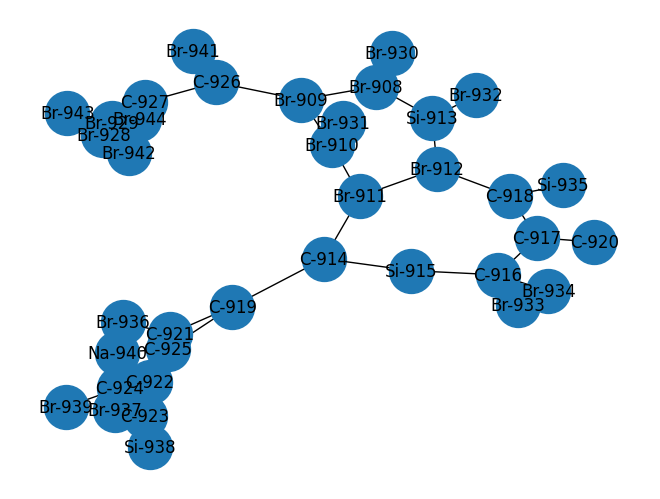

In [17]:
nx.draw(G, labels=labels, with_labels=True, node_size=1000)

In [18]:
only_labels = {k: v.split("-")[0] for k, v in labels.items()}

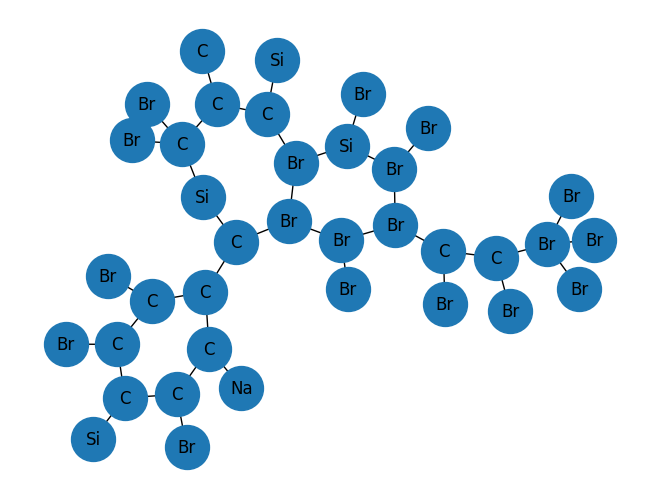

In [19]:
nx.draw_kamada_kawai(G, labels=only_labels, with_labels = True, node_size=1000)

In [155]:
 # A dictionary
# print(sorted(pageranks, key=lambda x: x[0], reverse=True))
sorted_pageranks = sorted(dict(pageranks).items(), key=itemgetter(1), reverse=True)
sorted_pageranks

[(929, 0.055926600531507185),
 (916, 0.049813746367424576),
 (927, 0.03963734740801351),
 (923, 0.038151164840454284),
 (922, 0.0378773212607319),
 (924, 0.0378773212607319),
 (926, 0.0377838331249879),
 (917, 0.037481231991298665),
 (921, 0.036864659693808095),
 (925, 0.036864659693808095),
 (918, 0.03659677499325158),
 (908, 0.03651526132518903),
 (913, 0.03623685903657659),
 (910, 0.03539364289734677),
 (909, 0.03513509630715521),
 (919, 0.034430161376453515),
 (912, 0.034105062849829275),
 (914, 0.033477181590726275),
 (911, 0.033231495608855244),
 (915, 0.024125069467093287),
 (942, 0.01593925264949064),
 (943, 0.01593925264949064),
 (944, 0.01593925264949064),
 (928, 0.015283915271861487),
 (938, 0.014863888479788343),
 (937, 0.014785626424369973),
 (939, 0.014785626424369973),
 (941, 0.014760088765166986),
 (920, 0.014673731621699899),
 (933, 0.014639589872936152),
 (934, 0.014639589872936152),
 (936, 0.014499367918175219),
 (940, 0.014499367918175219),
 (935, 0.0144230169560979

In [156]:
import pandas as pd
graph0 = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')

In [157]:
graph0.describe()

,betweenness,eigenvector,pagerank
count,37.000000,37.000000,37.000000
mean,0.124110,0.138650,0.027027
std,0.153028,0.089554,0.012261
min,0.000000,0.027402,0.014083
25%,0.000000,0.064919,0.014760
50%,0.092063,0.103101,0.033231
75%,0.187302,0.218342,0.036865
max,0.520635,0.335856,0.055927


In [161]:
df_centrality_measures = graph0.groupby('label').agg({'betweenness': np.mean, 'pagerank': np.mean,  'eigenvector': np.mean, }).reset_index()

In [162]:
df_centrality_measures['label'] = df_centrality_measures['label'].apply(lambda x: node_map.get(x))

<AxesSubplot: xlabel='label'>

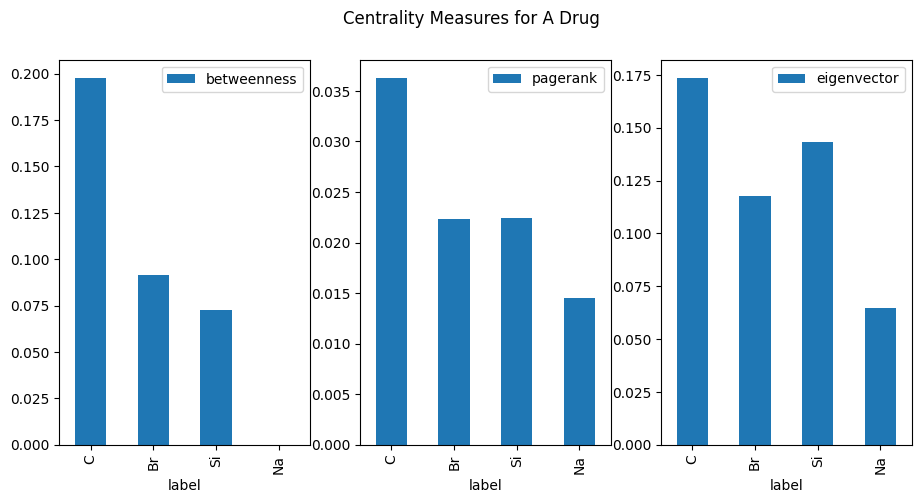

In [163]:
import matplotlib.pyplot as plt

fig, (ax1) = plt.subplots(1, 3, figsize=(11,5))
fig.suptitle('Centrality Measures for A Drug')
# ax1.plot(x, y)
df_centrality_measures.plot(kind='bar', x='label', y='betweenness', ax=ax1[0])
df_centrality_measures.plot(kind='bar', x='label', y='pagerank', ax= ax1[1])
# df_centrality_measures.plot(kind='bar', x='label', y='closeness', ax= ax2[0])
df_centrality_measures.plot(kind='bar', x='label', y='eigenvector', ax= ax1[2])

In [121]:
df_centrality_measures = graph0.groupby('label').agg({'betweenness': np.mean, 'pagerank': np.mean,  'eigenvector': np.mean, }).reset_index()

In [122]:
df_centrality_measures['label'] = df_centrality_measures['label'].apply(lambda x: node_map.get(x))

<AxesSubplot: xlabel='label'>

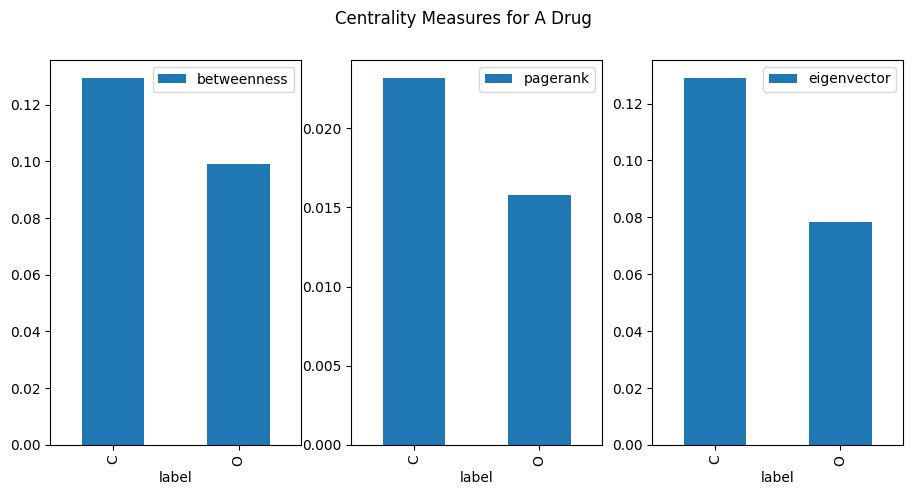

In [124]:
import matplotlib.pyplot as plt

fig, (ax1) = plt.subplots(1, 3, figsize=(11,5))
fig.suptitle('Centrality Measures for A Drug')
# ax1.plot(x, y)
df_centrality_measures.plot(kind='bar', x='label', y='betweenness', ax=ax1[0])
df_centrality_measures.plot(kind='bar', x='label', y='pagerank', ax= ax1[1])
# df_centrality_measures.plot(kind='bar', x='label', y='closeness', ax= ax2[0])
df_centrality_measures.plot(kind='bar', x='label', y='eigenvector', ax= ax1[2])

<AxesSubplot: xlabel='label'>

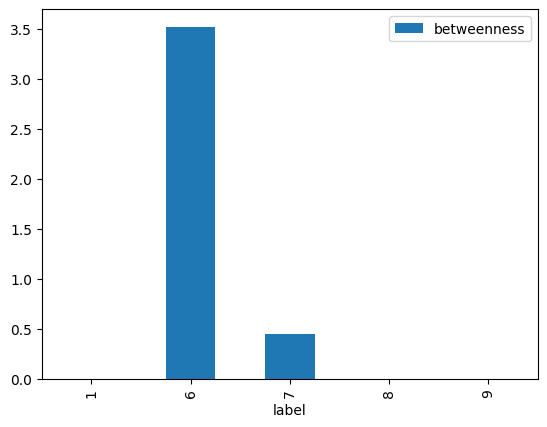

In [131]:
graph0.groupby('label').agg({'betweenness': np.sum, 'pageranks': np.sum}).reset_index().plot(kind='bar', x='label', y='betweenness')

<AxesSubplot: xlabel='label'>

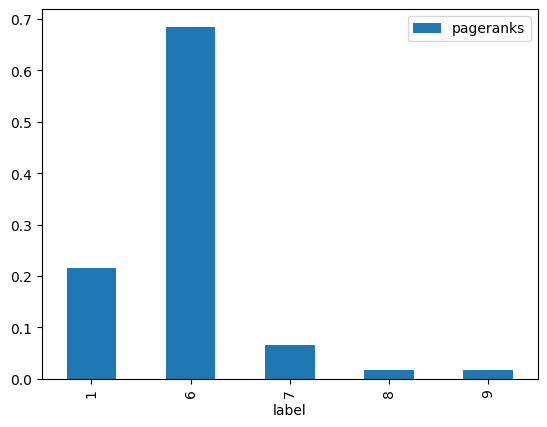

In [132]:
graph0.groupby('label').agg({'betweenness': np.sum, 'pageranks': np.sum}).reset_index().plot(kind='bar', x='label', y='pageranks')

## AIDS Dataset Analysis

The DTP AIDS Antiviral Screen has checked tens of thousands of compounds for evidence of anti-HIV activity. Available are screening results and chemical structural data on compounds that are not covered by a confidentiality agreement.

Screening Results (May 2004 Release)
The results of the screening tests are evaluated and placed in one of three categories:

CA - Confirmed active
CM - Confirmed moderately active
CI - Confirmed inactive


Chemical Structural Data - AIDS Screened (October 99 release)
The 2D structure (connection table) for each of the 42,390 compounds was retrieved from the DTP's Drug Information System. Conversion to a 3D structure was accomplished using the program Corina, created by Prof. Gasteiger's group.


In [20]:
import networkx as nx
import numpy as np
import scipy as sc
import os
import re

import util

def get_aids_node_map():
    activities = """0	C  
1	O  
2	N  
3	Cl 
4	F  
5	S  
6	Se 
7	P  
8	Na 
9	I  
10	Co 
11	Br 
12	Li 
13	Si 
14	Mg 
15	Cu 
16	As 
17	B  
18	Pt 
19	Ru 
20	K  
21	Pd 
22	Au 
23	Te 
24	W  
25	Rh 
26	Zn 
27	Bi 
28	Pb 
29	Ge 
30	Sb 
31	Sn 
32	Ga 
33	Hg 
34	Ho 
35	Tl 
36	Ni 
37	Tb"""

    node_map = {i.split('\t')[0].strip() : i.split('\t')[1].strip() for i in activities.split("\n")}

    return node_map

In [21]:
node_map = get_aids_node_map()
aids_graphs = read_graphfile_viz('./../dataset', dataname='AIDS', node_map = node_map)

node map: {'0': 'C', '1': 'O', '2': 'N', '3': 'Cl', '4': 'F', '5': 'S', '6': 'Se', '7': 'P', '8': 'Na', '9': 'I', '10': 'Co', '11': 'Br', '12': 'Li', '13': 'Si', '14': 'Mg', '15': 'Cu', '16': 'As', '17': 'B', '18': 'Pt', '19': 'Ru', '20': 'K', '21': 'Pd', '22': 'Au', '23': 'Te', '24': 'W', '25': 'Rh', '26': 'Zn', '27': 'Bi', '28': 'Pb', '29': 'Ge', '30': 'Sb', '31': 'Sn', '32': 'Ga', '33': 'Hg', '34': 'Ho', '35': 'Tl', '36': 'Ni', '37': 'Tb'}


In [98]:
G = aids_graphs[0][0].copy()
labels = aids_graphs[0][1].copy()
for n1 in list(G.nodes(data=True)):
    print(n1)

(1, {'label': '0', 'feat': array([ 1.        ,  0.        ,  9.77670002, -3.54900002])})
(2, {'label': '0', 'feat': array([ 1.        ,  0.        ,  8.91069984, -3.04900002])})
(6, {'label': '0', 'feat': array([ 1.        ,  0.        , 10.6427002 , -3.04900002])})
(3, {'label': '0', 'feat': array([ 1.        ,  0.        ,  8.91069984, -2.04900002])})
(12, {'label': '1', 'feat': array([ 2.        ,  0.        ,  8.04469967, -3.54900002])})
(4, {'label': '0', 'feat': array([ 1.        ,  0.        ,  9.77670002, -1.54900002])})
(15, {'label': '0', 'feat': array([ 1.        ,  0.        ,  8.04469967, -1.54900002])})
(5, {'label': '0', 'feat': array([ 1.        ,  0.        , 10.6427002 , -2.04900002])})
(7, {'label': '1', 'feat': array([ 2.        ,  0.        ,  9.77670002, -0.54900002])})
(10, {'label': '0', 'feat': array([ 1.        ,  0.        , 11.50879955, -1.54900002])})
(8, {'label': '0', 'feat': array([ 1.       ,  0.       , 10.6427002, -0.049    ])})
(9, {'label': '0', 'fe

In [99]:
G.degree()

DegreeView({1: 2, 2: 3, 6: 2, 3: 3, 12: 2, 4: 3, 15: 3, 5: 3, 7: 2, 10: 2, 8: 3, 9: 3, 11: 1, 46: 2, 13: 4, 14: 3, 27: 1, 28: 1, 38: 2, 25: 2, 16: 4, 17: 2, 21: 2, 22: 4, 24: 3, 18: 2, 19: 4, 20: 3, 44: 1, 23: 1, 42: 1, 43: 1, 26: 1, 29: 4, 30: 2, 34: 2, 35: 4, 37: 3, 31: 2, 32: 4, 33: 3, 45: 1, 36: 1, 40: 1, 41: 1, 39: 1, 47: 1})

In [100]:
# edges present / max number of possible edges
nx.density(G)

0.04902867715078631

In [101]:
# Why is it called transitivity? if A=B and B=C, the A must equal C. 
# Similarly, in triadic closure, if person A knows person B and person B knows person C, then person A probably knows person C: hence, transitivity. ↩
nx.transitivity(G)

0

# Centrality Measures

It is used to measure the importance (or “centrality” as in how “central” a node is in the graph) of various nodes in a graph

- Degree
- Betweenness centrality - This metric defines and measures the importance of a node in a network based upon how many times it occurs in the shortest path between all pairs of nodes in a graph.
- Closeness centrality - 
- Eigenvector centrality - This metric measures the importance of a node in a graph as a function of the importance of its neighbors. If a node is connected to highly important nodes, it will have a higher Eigen Vector Centrality score as compared to a node which is connected to lesser important nodes.

In [112]:
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G, max_iter=600) # Run eigenvector centrality

degree_dict = nx.degree(G)
pageranks = nx.pagerank(G, max_iter=400)


# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')
nx.set_node_attributes(G, degree_dict, 'degree')
nx.set_node_attributes(G, dict(pageranks), 'pagerank')

In [113]:
from operator import itemgetter

sorted_degree = sorted(dict(degree_dict).items(), key=itemgetter(1), reverse=True)

print("Top nodes by degree:")
for d in sorted_degree:
    print(d)

Top nodes by degree:
(13, 4)
(16, 4)
(22, 4)
(19, 4)
(29, 4)
(35, 4)
(32, 4)
(2, 3)
(3, 3)
(4, 3)
(15, 3)
(5, 3)
(8, 3)
(9, 3)
(14, 3)
(24, 3)
(20, 3)
(37, 3)
(33, 3)
(1, 2)
(6, 2)
(12, 2)
(7, 2)
(10, 2)
(46, 2)
(38, 2)
(25, 2)
(17, 2)
(21, 2)
(18, 2)
(30, 2)
(34, 2)
(31, 2)
(11, 1)
(27, 1)
(28, 1)
(44, 1)
(23, 1)
(42, 1)
(43, 1)
(26, 1)
(45, 1)
(36, 1)
(40, 1)
(41, 1)
(39, 1)
(47, 1)


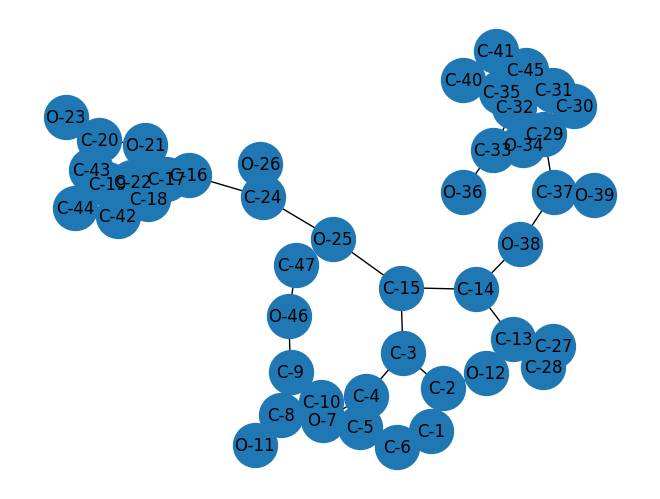

In [114]:
nx.draw(G, labels=labels, with_labels=True, node_size=1000)

In [115]:
only_labels = {k: v.split("-")[0] for k, v in labels.items()}

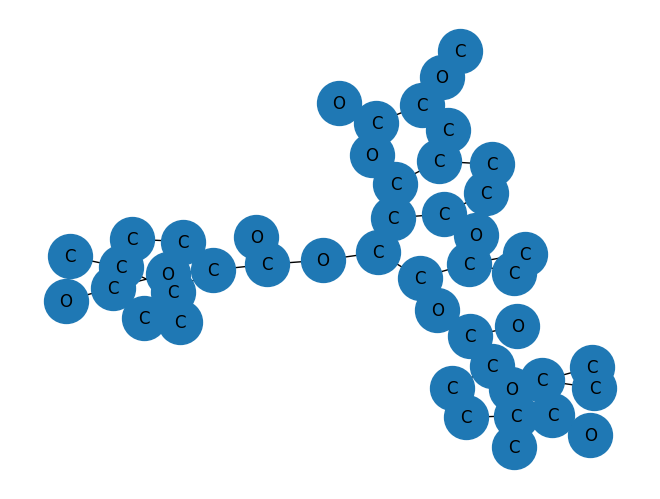

In [116]:
nx.draw_kamada_kawai(G, labels=only_labels, with_labels = True, node_size=1000)

In [117]:
len(aids_graphs)

2000

In [118]:
 # A dictionary
# print(sorted(pageranks, key=lambda x: x[0], reverse=True))
sorted_pageranks = sorted(dict(pageranks).items(), key=itemgetter(1), reverse=True)
sorted_pageranks

[(13, 0.03744940493542617),
 (35, 0.0372086684570787),
 (22, 0.03717854180847249),
 (32, 0.03645840094848765),
 (19, 0.03643798245934136),
 (29, 0.034836369694845284),
 (16, 0.0347649547655989),
 (8, 0.02894326859689393),
 (9, 0.028710930559679666),
 (33, 0.028421548205669056),
 (20, 0.02840450723319938),
 (37, 0.02790424001074242),
 (24, 0.027738658714073067),
 (5, 0.026286444961051755),
 (14, 0.026248125423580532),
 (2, 0.025971940006233287),
 (4, 0.02566930142564499),
 (15, 0.02549167897468975),
 (3, 0.02504379886900711),
 (46, 0.021980424508958707),
 (31, 0.018845444564905244),
 (18, 0.018832185045255554),
 (10, 0.018775715022274517),
 (7, 0.01866345419388106),
 (34, 0.018646788500311536),
 (21, 0.01862718603207331),
 (30, 0.018603331953109554),
 (17, 0.018582920886766982),
 (38, 0.01853546725662077),
 (12, 0.01850688084147378),
 (6, 0.018458047148375564),
 (1, 0.018393396448437585),
 (25, 0.01827257928765729),
 (47, 0.012532314219451893),
 (11, 0.011391249457109572),
 (36, 0.01124

In [119]:
import pandas as pd
graph0 = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')

In [92]:
graph0.head()

,label,feat,betweenness,eigenvector,degree,pagerank
48,2,"[4.0, 0.0, 2.865999937057495, -0.4329999983310...",0.177778,0.288336,"((48, 2), (49, 3), (50, 2), (51, 3), (52, 4), ...",0.088308
49,0,"[1.0, 0.0, 3.7320001125335693, -0.933000028133...",0.266667,0.290104,"((48, 2), (49, 3), (50, 2), (51, 3), (52, 4), ...",0.132103
50,2,"[4.0, 0.0, 4.598100185394287, -0.4329999983310...",0.177778,0.288336,"((48, 2), (49, 3), (50, 2), (51, 3), (52, 4), ...",0.088308
51,0,"[1.0, 0.0, 4.598100185394287, 0.5669999718666077]",0.355556,0.403009,"((48, 2), (49, 3), (50, 2), (51, 3), (52, 4), ...",0.131441
52,0,"[1.0, 0.0, 3.732100009918213, 1.0670000314712524]",0.511111,0.512782,"((48, 2), (49, 3), (50, 2), (51, 3), (52, 4), ...",0.174250


In [120]:
node_map_reversed = {v:k for k, v in node_map.items()}
node_map_reversed

{'C': '0',
 'O': '1',
 'N': '2',
 'Cl': '3',
 'F': '4',
 'S': '5',
 'Se': '6',
 'P': '7',
 'Na': '8',
 'I': '9',
 'Co': '10',
 'Br': '11',
 'Li': '12',
 'Si': '13',
 'Mg': '14',
 'Cu': '15',
 'As': '16',
 'B': '17',
 'Pt': '18',
 'Ru': '19',
 'K': '20',
 'Pd': '21',
 'Au': '22',
 'Te': '23',
 'W': '24',
 'Rh': '25',
 'Zn': '26',
 'Bi': '27',
 'Pb': '28',
 'Ge': '29',
 'Sb': '30',
 'Sn': '31',
 'Ga': '32',
 'Hg': '33',
 'Ho': '34',
 'Tl': '35',
 'Ni': '36',
 'Tb': '37'}

In [121]:
df_centrality_measures = graph0.groupby('label').agg({'betweenness': np.mean, 'pagerank': np.mean,  'eigenvector': np.mean, }).reset_index()

In [122]:
df_centrality_measures['label'] = df_centrality_measures['label'].apply(lambda x: node_map.get(x))

<AxesSubplot: xlabel='label'>

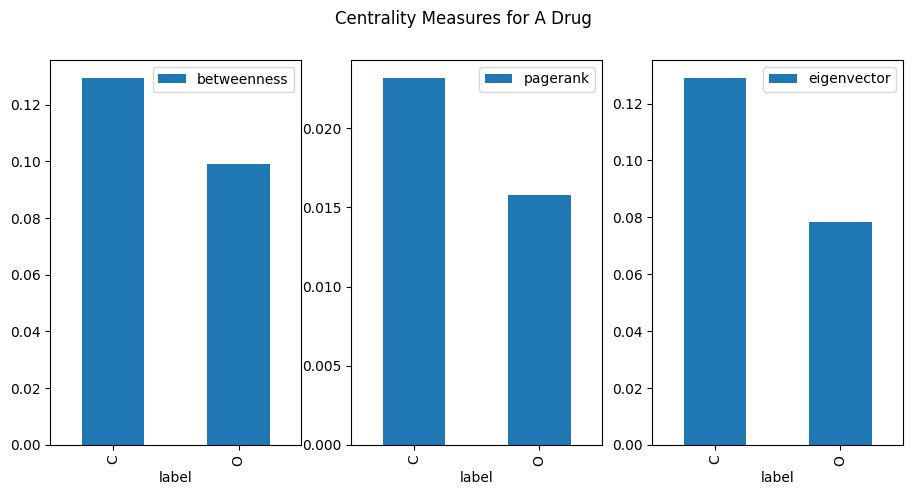

In [124]:
import matplotlib.pyplot as plt

fig, (ax1) = plt.subplots(1, 3, figsize=(11,5))
fig.suptitle('Centrality Measures for A Drug')
# ax1.plot(x, y)
df_centrality_measures.plot(kind='bar', x='label', y='betweenness', ax=ax1[0])
df_centrality_measures.plot(kind='bar', x='label', y='pagerank', ax= ax1[1])
# df_centrality_measures.plot(kind='bar', x='label', y='closeness', ax= ax2[0])
df_centrality_measures.plot(kind='bar', x='label', y='eigenvector', ax= ax1[2])

In [111]:
df_centrality_measures.plot(kind='bar', x='label', y='pageranks')

KeyError: 'pageranks'

## DHFR (dihydrofolate reductase inhibitor) Dataset Analysis

Commonly used for fighting malaria and other protozoal infections, as well as for treating fungal, bacterial, and mycobacterial infections.



In [164]:
# node_map = get_aids_node_map()
dhfr_graphs = read_graphfile_viz('./../dataset', dataname='DHFR')

node map: None


In [165]:
G = dhfr_graphs[1][0].copy()
labels = dhfr_graphs[1][1].copy()
for n1 in list(G.nodes(data=True)):
    print(n1)

(32, {'label': '7', 'feat': array([-2.90478 , -1.01587 ,  0.211413])})
(31, {'label': '1', 'feat': array([-2.90098 ,  0.29513 ,  0.447813])})
(36, {'label': '6', 'feat': array([-1.71658 ,  0.93103 ,  0.413313])})
(33, {'label': '6', 'feat': array([-1.81688 , -1.73217 , -0.069487])})
(43, {'label': '6', 'feat': array([-4.09698 , -1.66927 ,  0.257313])})
(34, {'label': '7', 'feat': array([-0.62808 , -1.08337 , -0.124487])})
(35, {'label': '6', 'feat': array([-0.51588 ,  0.28753 ,  0.111713])})
(47, {'label': '7', 'feat': array([ 0.59402 , -1.91707 , -0.457687])})
(37, {'label': '6', 'feat': array([0.76792 , 1.00163 , 0.049513])})
(44, {'label': '7', 'feat': array([-1.78218 ,  2.29623 ,  0.627713])})
(38, {'label': '6', 'feat': array([1.60162 , 1.08033 , 1.177213])})
(42, {'label': '6', 'feat': array([ 1.18882 ,  1.61703 , -1.139187])})
(39, {'label': '6', 'feat': array([2.82772 , 1.75363 , 1.117313])})
(49, {'label': '6', 'feat': array([1.29212 , 0.61103 , 2.110013])})
(40, {'label': '6'

In [166]:
G.degree()

DegreeView({32: 3, 31: 2, 36: 3, 33: 2, 43: 3, 34: 3, 35: 3, 47: 4, 37: 3, 44: 3, 38: 3, 42: 3, 39: 3, 49: 1, 40: 3, 48: 1, 41: 3, 45: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 46: 4, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1})

In [167]:
# edges present / max number of possible edges
nx.density(G)

0.07126436781609195

In [168]:
# Why is it called transitivity? if A=B and B=C, the A must equal C. 
# Similarly, in triadic closure, if person A knows person B and person B knows person C, then person A probably knows person C: hence, transitivity. ↩
nx.transitivity(G)

0

# Centrality Measures

It is used to measure the importance (or “centrality” as in how “central” a node is in the graph) of various nodes in a graph

- Degree
- Betweenness centrality - This metric defines and measures the importance of a node in a network based upon how many times it occurs in the shortest path between all pairs of nodes in a graph.
- Closeness centrality - 
- Eigenvector centrality - This metric measures the importance of a node in a graph as a function of the importance of its neighbors. If a node is connected to highly important nodes, it will have a higher Eigen Vector Centrality score as compared to a node which is connected to lesser important nodes.

In [170]:
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G, max_iter=600) # Run eigenvector centrality

degree_dict = nx.degree(G)
pageranks = nx.pagerank(G, max_iter=400)


# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')
nx.set_node_attributes(G, degree_dict, 'degree')
nx.set_node_attributes(G, dict(pageranks), 'pagerank')

In [155]:
from operator import itemgetter

sorted_degree = sorted(dict(degree_dict).items(), key=itemgetter(1), reverse=True)

print("Top nodes by degree:")
for d in sorted_degree:
    print(d)

Top nodes by degree:
(47, 4)
(46, 4)
(32, 3)
(36, 3)
(43, 3)
(34, 3)
(35, 3)
(37, 3)
(44, 3)
(38, 3)
(42, 3)
(39, 3)
(40, 3)
(41, 3)
(31, 2)
(33, 2)
(49, 1)
(48, 1)
(45, 1)
(50, 1)
(51, 1)
(52, 1)
(53, 1)
(54, 1)
(55, 1)
(56, 1)
(57, 1)
(58, 1)
(59, 1)
(60, 1)


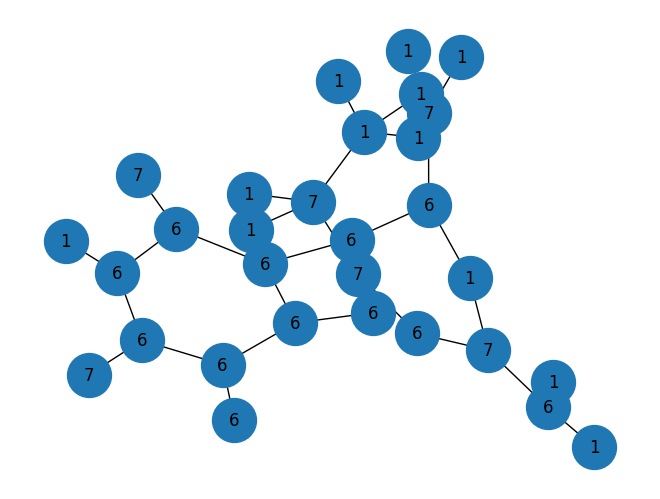

In [171]:
nx.draw(G,labels=labels, with_labels=True, node_size=1000)

In [172]:
only_labels = {k: v.split("-")[0] for k, v in labels.items()}

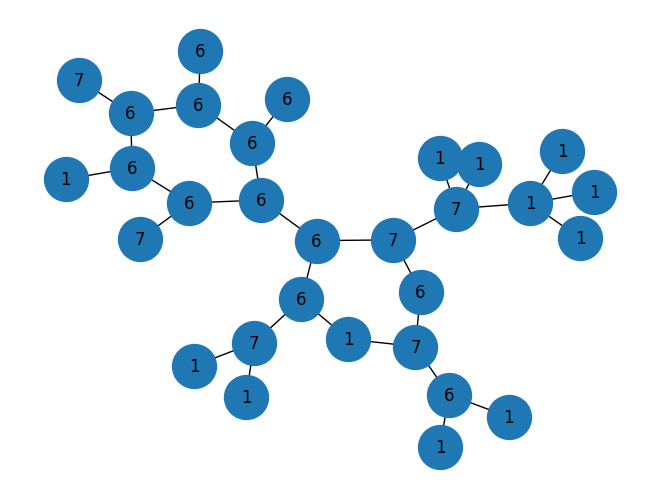

In [173]:
nx.draw_kamada_kawai(G, labels=only_labels, with_labels = True, node_size=1000)

In [172]:
 # A dictionary
# print(sorted(pageranks, key=lambda x: x[0], reverse=True))
sorted_pageranks = sorted(dict(pageranks).items(), key=itemgetter(1), reverse=True)
sorted_pageranks

[(46, 0.0678077352105537),
 (47, 0.06265434444823893),
 (43, 0.05050246916315447),
 (44, 0.04992842828232483),
 (40, 0.04707109620699021),
 (39, 0.046739479103999615),
 (41, 0.046739479103999615),
 (38, 0.045513005996440564),
 (42, 0.045513005996440564),
 (32, 0.04474484572293766),
 (36, 0.043694687952920405),
 (34, 0.042748183793091116),
 (37, 0.04256470393742488),
 (35, 0.041550924139716394),
 (31, 0.030056981163220437),
 (33, 0.029788883964208524),
 (56, 0.019408913844235334),
 (57, 0.019408913844235334),
 (58, 0.019408913844235334),
 (52, 0.019309500518476047),
 (53, 0.019309500518476047),
 (54, 0.01914685387571817),
 (55, 0.01914685387571817),
 (45, 0.01833722633366797),
 (59, 0.018314332243894588),
 (60, 0.018314332243894588),
 (48, 0.018242435472665047),
 (50, 0.018242435472665047),
 (49, 0.017895766863228156),
 (51, 0.017895766863228156)]

In [173]:
import pandas as pd
graph0 = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')

In [174]:
graph0.describe()

,betweenness,eigenvector,pageranks
count,30.000000,30.000000,30.000000
mean,0.130788,0.157276,0.033333
std,0.165692,0.094308,0.015482
min,0.000000,0.041465,0.017896
25%,0.000000,0.087520,0.019147
50%,0.096059,0.135913,0.029923
75%,0.206897,0.220946,0.045513
max,0.581281,0.360095,0.067808


In [175]:
df_centrality_measures = graph0.groupby('label').agg({'betweenness': np.sum, 'pageranks': np.sum}).reset_index()

<AxesSubplot: xlabel='label'>

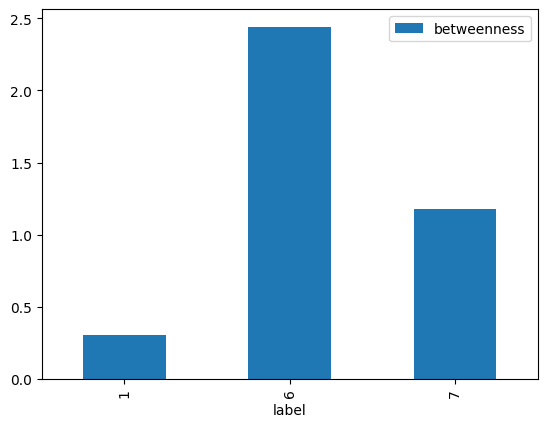

In [176]:
df_centrality_measures.plot(kind='bar', x='label', y='betweenness')

<AxesSubplot: xlabel='label'>

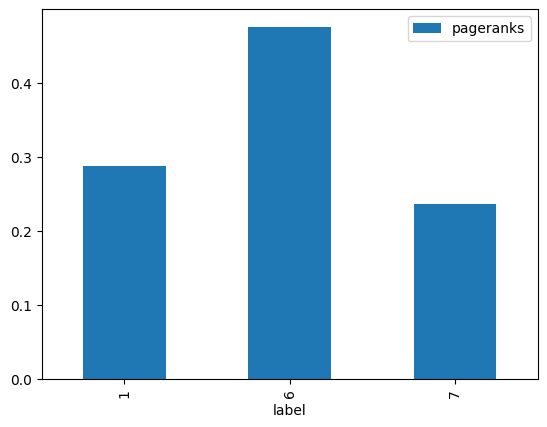

In [177]:
df_centrality_measures.plot(kind='bar', x='label', y='pageranks')